In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image

In [ ]:
train_dir = 'C:/Users/DELL/Downloads/New_folder/SEC_Four/train' 
test_dir = 'C:/Users/DELL/Downloads/New_folder/SEC_Four/train'

In [35]:
# Set the input shape
input_shape = (128, 128, 3)
batch_size = 32

In [36]:
# Use ImageDataGenerator for data augmentation
data_generator = ImageDataGenerator(rescale=1./255)

In [37]:
# Load training images
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='binary',  # Set for binary classification
    shuffle=False)

Found 12017 images belonging to 2 classes.


In [38]:
# Load test images
test_generator = data_generator.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='binary',  # Set for binary classification
    shuffle=False)

Found 216 images belonging to 2 classes.


In [39]:
# Define the CNN model for feature extraction
model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.5)
])

C:\Users\mf\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Extract features from training images
train_features = model.predict(train_generator)
train_features = train_features.reshape(train_features.shape[0], -1)  # Flatten for logistic regression
train_labels = train_generator.classes

C:\Users\mf\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


376/376 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step


In [41]:
# Extract features from test images
test_features = model.predict(test_generator)
test_features = test_features.reshape(test_features.shape[0], -1)
test_labels = test_generator.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [42]:
# Train logistic regression classifier
lr_classifier = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0, penalty='l2')
lr_classifier.fit(train_features, train_labels)

LogisticRegression(max_iter=1000)

In [43]:
# Make predictions on the test data
test_predictions = lr_classifier.predict(test_features)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 75.46%


In [44]:
# Classification report
print("\nClassification Report:\n", classification_report(test_labels, test_predictions, target_names=class_names.values()))


Classification Report:
               precision    recall  f1-score   support

        Male       0.74      0.79      0.76       108
      Female       0.77      0.72      0.75       108

    accuracy                           0.75       216
   macro avg       0.76      0.75      0.75       216
weighted avg       0.76      0.75      0.75       216



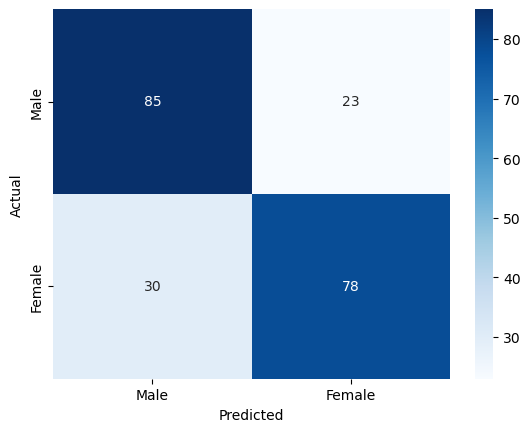

In [45]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
# Save the CNN feature extractor
model.save('cnn_feature_extractor.h5')

# Save the trained logistic regression model
joblib.dump(lr_classifier, 'lr_classifier.pkl')

['lr_classifier.pkl']

In [51]:
# Function to classify new images
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Extract features using the CNN model
    features = model.predict(img_array)
    features = features.reshape(1, -1)

    # Classify the features with the logistic regression model
    prediction = lr_classifier.predict(features)
    
    # Interpret the prediction as male or female
    class_labels = {0: 'Female', 1: 'Male'}  # Update based on binary classification
    result = class_labels[prediction[0]]
    
    return result  # Add return statement here

# Test the function with a new image
img_path = r'E:\\FCI 4 IT\\Computer vision\\dataset\\test\\female\\113037.jpg.jpg'
result = classify_image(img_path)
print(f"The image is classified as: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The image is classified as: Female
